Env: ocean + dwave <br>
Auth: sorin_moldoveanu <br>
Referfences: https://docs.dwavesys.com/docs/latest<br>
             http://docs.ocean.dwavesys.com/en/latest/overview/solving_problems.html<br>
           

__Sample Map Coloring__

 problem: map coloring<br>
 

In [5]:
#imports
import dwavebinarycsp
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import networkx as nx
import matplotlib.pyplot as plt

provinces=['AG','DB','PH','BZ','BR','TL','CT','CL','IL','IF','GR','TR']
neighbors=[('AG','DB'),('AG','TL'),('DB','PH'),('DB','GR'),('DB','IF'),
           ('TR','GR'),('GR','IF'),('GR','CL'),('PH','BZ'),('PH','IL'),
           ('PH','IF'),('IF','IL'),('IF','CL'),('BZ','BR'),('BZ','IL'),
           ('BR','TL'),('BR','IL'),('BR','CT'),('IL','CL'),('IL','CT'),
           ('CL','CT'),('TL','CT')]

#function - two nodes with shared edge do not both have one color
def not_both_1(v,u):
    return not (v and u)

# Function that plots a returned sample
def plot_map(sample):
    G = nx.Graph()
    G.add_nodes_from(provinces)
    G.add_edges_from(neighbors)
    # Translate from binary to integer color representation
    color_map = {}
    for province in provinces:
          for i in range(colors):
            if sample[province+str(i)]:
                color_map[province] = i
    # Plot the sample with color-coded nodes
    node_colors = [color_map.get(node) for node in G.nodes()]
    nx.draw_circular(G, with_labels=True, node_color=node_colors, node_size=3000, cmap=plt.cm.rainbow)
    plt.show()

#nr_colors_used = 4; valid configruations
one_color_configurations={(0,0,0,1),(0,0,1,0),(0,1,0,0),(1,0,0,0)}
colors=len(one_color_configurations)
print('colors:',colors)

# create a binary constraint satisfaction problem
csp=dwavebinarycsp.ConstraintSatisfactionProblem(dwavebinarycsp.BINARY)

#add constraint to each node - select a single color
for province in provinces:
    variables=[province+str(i) for i in range(colors)]
    csp.add_constraint(one_color_configurations, variables)
    
#add constr for neighbours not share the same color
for neighbor in neighbors:
    v,u = neighbor
    for i in range(colors):
        variables=[v+str(i), u+str(i)]
        csp.add_constraint(not_both_1,variables)
        


colors: 4


In [6]:
#convert CSP to QUBO
bqm=dwavebinarycsp.stitch(csp)
#run
#sampler = EmbeddingComposite(DWaveSampler(endpoint='https://cloud.dwavesys.com/sapi', token='DEV-8594cb51b101bbcec557e80efc80487f60317b15', solver='DW_2000Q_2_1'))
#response = sampler.sample(bqm, num_reads=50)
sampler = EmbeddingComposite(DWaveSampler())         # doctest: +SKIP
response = sampler.sample(bqm, num_reads=50)         # doctest: +SKIP

{'AG0': 1, 'AG1': 0, 'AG2': 0, 'AG3': 0, 'BR0': 0, 'BR1': 0, 'BR2': 0, 'BR3': 0, 'BZ0': 0, 'BZ1': 1, 'BZ2': 0, 'BZ3': 0, 'CL0': 1, 'CL1': 0, 'CL2': 0, 'CL3': 0, 'CT0': 0, 'CT1': 1, 'CT2': 0, 'CT3': 0, 'DB0': 0, 'DB1': 0, 'DB2': 1, 'DB3': 0, 'GR0': 0, 'GR1': 0, 'GR2': 0, 'GR3': 1, 'IF0': 0, 'IF1': 1, 'IF2': 0, 'IF3': 0, 'IL0': 0, 'IL1': 0, 'IL2': 0, 'IL3': 1, 'PH0': 1, 'PH1': 0, 'PH2': 0, 'PH3': 0, 'TL0': 0, 'TL1': 0, 'TL2': 1, 'TL3': 0, 'TR0': 1, 'TR1': 0, 'TR2': 1, 'TR3': 0}


/root/anaconda3/envs/ocean/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


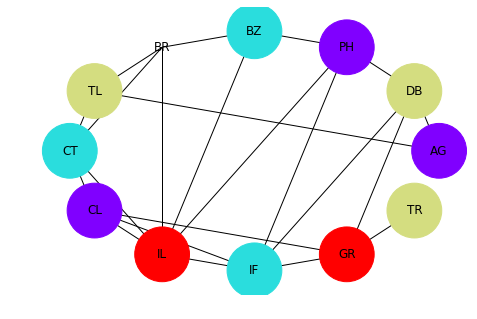

In [7]:
#NOW PLOT RESULTS

# Plot the lowest-energy sample if it meets the constraints
sample = next(response.samples())
print(sample)
plot_map(sample)
#if not csp.check(sample):
#    print("Failed to color map")
#else:
#    plot_map(sample)